# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Suvrangshu Ghosh
#----------------------
#Modification History:
# Please Use Your API Key in api_keys.py
#----------------------

# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time
import api_keys

#Calculate current date:

#print("Current date "  + time.strftime("%x"))
cur_date = time.strftime("%x")

#-----------------------------------
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#filewrite = open(output_data_file,"w") 

#filewrite.write("Test write" + '\n') #write to txt file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

614
['udachnyy', 'beringovskiy', 'hasaki', 'codrington', 'vaitupu', 'moron de la frontera', 'klamath falls', 'carnarvon', 'ushuaia', 'pangnirtung', 'baoning', 'jiuquan', 'yellowknife', 'rikitea', 'arlit', 'mount gambier', 'jamestown', 'bluff', 'honiara', 'butaritari', 'canals', 'thompson', 'phan thiet', 'georgetown', 'alofi', 'vaini', 'nuevo progreso', 'conceicao da barra', 'longyearbyen', 'fortuna', 'cape town', 'sabinas', 'busselton', 'atuona', 'saskylakh', 'kodiak', 'caravelas', 'hithadhoo', 'inhambane', 'dikson', 'ornskoldsvik', 'benguela', 'souillac', 'puerto ayora', 'illoqqortoormiut', 'road town', 'cherskiy', 'presidencia roque saenz pena', 'buta', 'ostrovnoy', 'dubenskiy', 'norman wells', 'nikolskoye', 'broken hill', 'kalmunai', 'lagoa', 'shaunavon', 'talara', 'tsihombe', 'tidore', 'san patricio', 'punta arenas', 'port alfred', 'albany', 'freetown', 'santa cruz cabralia', 'trelew', 'fort saint james', 'tawkar', 'burnie', 'bethel', 'hilo', 'coihaique', 'taolanaro', 'avarua', 'tu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:

#create data frame for weather
weather_df = pd.DataFrame(columns=
                          ['City',
                           'Cloudiness',
                           'Country',
                           'Date',
                           'Humidity',
                           'Lat',
                           'Lng',
                           'Max Temp',
                           'Wind Speed']
                           )
#declare counter to count records and sets (50 record = 1 set)

count = 0
xset = 1
for xcity in cities:
    try:
        if count == 0:
            print("*** Begin of data retrival for set # ", xset, " ***") #print- begin statement at first
            print("_"  * 31,'\n')
            
        count+=1
        api = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_keys.api_key}&q={xcity}"
        print(api)
        print(f"Processing Record {count} of Set {xset} | {xcity}")
        print(api)
        if count == 50:
            count = 0
            xset+=1
        response = requests.get(api).json()
        
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        
        weather = {
            "City":xcity,
            "Cloudiness":cloudiness,
            "Country":country,
            "Date":date,
            "Humidity":humidity,
            "Lat":lat,
            "Lng":lng,
            "Max Temp":max_temp,
            "Wind Speed":wind_speed}
        
        weather_df = weather_df.append(weather, ignore_index=True)
        
    except:
        print("City not found. Skipping...")
        
print("_"  * 31,'\n')
        
print("*** Data Retrieval Complete ***")

print("_"  * 31,'\n')

    

*** Begin of data retrival for set #  1  ***
_______________________________ 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=udachnyy
Processing Record 1 of Set 1 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=beringovskiy
Processing Record 2 of Set 1 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hasaki
Processing Record 3 of Set 1 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=codrington
Processin

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=busselton
Processing Record 33 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=atuona
Processing Record 34 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=saskylakh
Processing Record 35 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kodiak
Processing Record 36 of Set 1 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imp

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=port alfred
Processing Record 13 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=albany
Processing Record 14 of Set 2 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=freetown
Processing Record 15 of Set 2 | freetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=freetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=santa cruz cabralia
Processing Record 16 of Set 2 | santa cruz cabralia
http://api.openweathermap.o

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ponta do sol
Processing Record 44 of Set 2 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vila franca do campo
Processing Record 45 of Set 2 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sri aman
Processing Record 46 of Set 2 | sri aman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sri aman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=warren
Processing Record 4

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=castro
Processing Record 24 of Set 3 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kapaa
Processing Record 25 of Set 3 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=boyabat
Processing Record 26 of Set 3 | boyabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=boyabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mailani
Processing Record 27 of Set 3 | mailani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb64

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nalut
Processing Record 6 of Set 4 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=iqaluit
Processing Record 7 of Set 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nisia floresta
Processing Record 8 of Set 4 | nisia floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nisia floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=krasnoselkup
Processing Record 9 of Set 4 | krasnoselkup
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=waipawa
Processing Record 37 of Set 4 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=barentsburg
Processing Record 38 of Set 4 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=barentsburg
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=djambala
Processing Record 39 of Set 4 | djambala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=djambala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=korla
Processing Record 40 of Set 4 | korla
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=broome
Processing Record 19 of Set 5 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=east london
Processing Record 20 of Set 5 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=antofagasta
Processing Record 21 of Set 5 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=batticaloa
Processing Record 22 of Set 5 | batticaloa
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=opole lubelskie
Processing Record 50 of Set 5 | opole lubelskie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=opole lubelskie
*** Begin of data retrival for set #  6  ***
_______________________________ 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=joao pessoa
Processing Record 1 of Set 6 | joao pessoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=joao pessoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=morondava
Processing Record 2 of Set 6 | morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bonavista
Processing Record 31 of Set 6 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=attawapiskat
Processing Record 32 of Set 6 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=balaipungut
Processing Record 33 of Set 6 | balaipungut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=balaipungut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=flinders
Processing Record 34 of Set 6 | flinders


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ha
Processing Record 12 of Set 7 | ha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ha
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=valparaiso
Processing Record 13 of Set 7 | valparaiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=valparaiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=geraldton
Processing Record 14 of Set 7 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=komsomolskiy
Processing Record 15 of Set 7 | komsomolskiy
http://api.openweathermap

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tyshkivka
Processing Record 43 of Set 7 | tyshkivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tyshkivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=panguipulli
Processing Record 44 of Set 7 | panguipulli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=panguipulli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=salalah
Processing Record 45 of Set 7 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=pompei
Processing Record 46 of Set 7 | pompei
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=banmo
Processing Record 23 of Set 8 | banmo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=banmo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=zemetchino
Processing Record 24 of Set 8 | zemetchino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=zemetchino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kapoeta
Processing Record 25 of Set 8 | kapoeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kapoeta
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=portoferraio
Processing Record 26 of Set 8 | portofe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lima
Processing Record 3 of Set 9 | lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sur
Processing Record 4 of Set 9 | sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=juruti
Processing Record 5 of Set 9 | juruti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=juruti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=terrace
Processing Record 6 of Set 9 | terrace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tsumeb
Processing Record 34 of Set 9 | tsumeb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tsumeb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sarkand
Processing Record 35 of Set 9 | sarkand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sarkand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ust-ishim
Processing Record 36 of Set 9 | ust-ishim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ust-ishim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=boa vista
Processing Record 37 of Set 9 | boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imp

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=high level
Processing Record 15 of Set 10 | high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=high level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=charters towers
Processing Record 16 of Set 10 | charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mana
Processing Record 17 of Set 10 | mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hambantota
Processing Record 18 of Set 10 | hambantota
h

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=meyungs
Processing Record 46 of Set 10 | meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=meyungs
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=klaksvik
Processing Record 47 of Set 10 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=launceston
Processing Record 48 of Set 10 | launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=karwar
Processing Record 49 of Set 10 | 

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=karatuzskoye
Processing Record 27 of Set 11 | karatuzskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=karatuzskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rundu
Processing Record 28 of Set 11 | rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=katobu
Processing Record 29 of Set 11 | katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=dawei
Processing Record 30 of Set 11 | dawei
http://api.openweathermap.org/data/2.5/weather?units=Impe

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kamina
Processing Record 8 of Set 12 | kamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vardo
Processing Record 9 of Set 12 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=moses lake
Processing Record 10 of Set 12 | moses lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=moses lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vinh
Processing Record 11 of Set 12 | vinh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sretensk
Processing Record 39 of Set 12 | sretensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sretensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lufilufi
Processing Record 40 of Set 12 | lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ishigaki
Processing Record 41 of Set 12 | ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=san pedro
Processing Record 42 of Set 12 | san pedro
http://api.openweathermap.org/data/2.5/weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#check dataframe 
weather_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [23]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,udachnyy,68,RU,1550206854,66,66.42,112.40,9.42,7.34
1,beringovskiy,76,RU,1550206544,91,63.05,179.32,30.70,20.13
2,hasaki,75,JP,1550204220,51,35.73,140.83,39.20,4.70
3,codrington,40,AU,1550203200,39,-28.95,153.24,84.20,18.34
4,moron de la frontera,0,ES,1550205000,87,37.12,-5.45,48.20,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

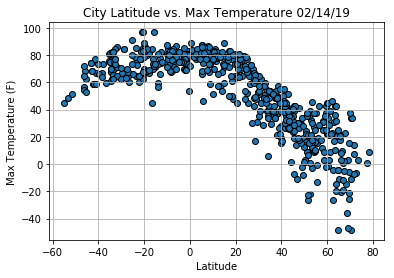

In [24]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors = 'black')

plt.grid()
plt.title("City Latitude vs. Max Temperature " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/Latitude_MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

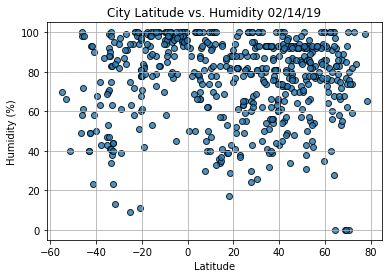

In [25]:
#scatter plot latitude Vs Humidity

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Humidity " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/Latitude_Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

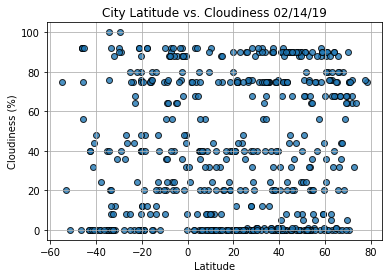

In [26]:
#scatter plot latitude Vs Cloudniess
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Cloudiness " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('output_data/Latitude_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

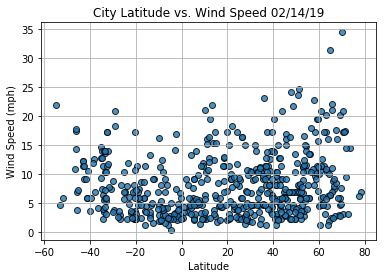

In [27]:
#scatter plot latitude Vs Wind Speed 
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Wind Speed " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('output_data/Latitude_Wind_Speed.png')
plt.show()